## **Cerebral Stroke Prediction**

### **A. Introduction**

- **Name**  : Livia Amanda Annafiah
- **Dataset** : [Cerebral Stroke Dataset](https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/data)
- **Hugging Face**: [Link](https://huggingface.co/spaces/liviamanda/CerebralStroke)

---------------------

**Problem Statement**

A healthcare center is facing challenges in **predicting strokes in patients**. This leads to delayed interventions and puts patients lives at risk. This problem comes from the complex nature of stroke symptoms and various risk factors, including age, health condition, and lifestyle choices. Not being able to quickly spot who is at high risk of a stroke makes it hard to act fast with medical help. As a result, patients might not get the urgent care they need, which could prevent serious consequences like long-term disability or even death. This situation shows the urgent need for better tools that can predict strokes earlier and customize care to each person's needs.

To address this challenges, the company wanted to develop a model capable of analyzing patient data to predict the likelihood of a stroke. By creating this algorithm, the healthcare center will be able to thoroughly analyze various aspects of patient data, such as medical history, lifestyle habits, and physiological indicators, to identify key patterns and risk factors linked to strokes.

The dataset for this analysis focuses on cerebral strokes, containing information about patients' personal details, health status, lifestyle, and whether they have experienced a stroke.

**Objective**

This project focuses on creating a **classification model** to predict strokes, selecting the best performer among `KNN`, `SVM`, `Logistic Regression`, `Decision Tree`, `Random Forest`, and `XGBoost`. The key evaluation metric for assessing model performance is `Recall`, which will be used to determine the effectiveness of each model in identifying stroke cases.

### **B. Libraries**

The libraries used to develop the model are as follows:

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import phik
import pickle

# Import libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

# Import libraries for model creation and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay

**Libraries Function**
- pandas: data manipulation and analysis
- matplotlib : data visualization and statistical plotting
- seaborn: data visualization and statistical plotting
- phik: feature selection
- pickle: saving model
- sklearn: machine learning algorithms, model creation, feature engineering, and evaluation
- feature engine: handling outliers
- imblearn: handling imbalance data and make pipeline
- xgboost: model creation

### **C. Data Loading & Cleaning**

In this initial stage, the data is loaded and cleaned to ensure that the analysis relies on accurate and dependable information.

#### **i. Data Loading**

To begin, the data is read and the first 10 and final 10 entries of the dataframe are displayed, providing an overview of the dataset's information.

In [2]:
# Load dataset
df_ori = pd.read_csv('P1M2_livia_amanda_dataset.csv')

# Duplicate dataset
df = df_ori.copy()

# Show the first 10 data
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [3]:
# Show the last 10 data
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43390,10096,Female,69.0,0,0,Yes,Self-employed,Urban,229.85,31.2,never smoked,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0
43392,45266,Female,18.0,0,0,No,Private,Urban,131.96,22.8,NaN,0
43393,69344,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


Based on the provided data, it appears to be a dataframe containing information related to individuals and potential risk factors for strokes. It includes information about individuals' demographics (gender, age), lifestyle factors (smoking status, BMI), and health conditions (hypertension, heart disease). 

Here is a table that contains additional details about the dataset:

<center>

| **Column Name**    | **Description**                                          | **Data Type**          |
|:-------------------|:----------------------------------------------------------|:-----------------------|
| `id`                 | Unique identifier for each individual                     | Numerical Continuous   |
| `gender`             | Gender of the individual                                   | Categorical Nominal    |
| `age`                | Age of the individual                                      | Numerical Discrete   |
| `hypertension`       | Indicates whether the individual has hypertension (0 = No, 1 = Yes)    | Categorical Encoded    |
| `heart_disease`      | Indicates whether the individual has any form of heart disease (0 = No, 1 = Yes)   | Categorical Encoded    |
| `ever_married`       | Shows whether the individual has ever been married              | Categorical Nominal    |
| `work_type`          | Type of work the individual is engaged in                  | Categorical Nominal    |
| `Residence_type`     | Type of residence                                          | Categorical Nominal    |
| `avg_glucose_level`  | Average glucose level in the blood                          | Numerical Continuous   |
| `bmi`                | Body Mass Index                                            | Numerical Continuous   |
| `smoking_status`     | Smoking status of the individual                           | Categorical Nominal    |
| `stroke`             | Indicates whether the individual has had a stroke (0 = No, 1 = Yes)           | Categorical Encoded    |

The `info` method will show primary details about the dataset's information.

In [4]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


The dataset contains **43.400 rows** and **12 columns**. Some columns, which are `BMI` and `smoking status`, have missing values that will require handling in the future processes. The data types are correct as expected, including 3 floats, 4 integers, and 5 object types.

Next, exploring the dataset's distribution using the `describe` method will provide insights into its numerical characteristics and overall statistics.

In [5]:
# Check descriptive statistictis
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Here are the key insights from the statistical analysis:

- The dataset contains 43.400 entries, with ages ranging from 0 years to 82 years old.
- Around 9.35% of individuals in the dataset have hypertension, and approximately 4.75% have heart disease.
- The average glucose level across the dataset is approximately 104.48 mg/dL, with a wide range from 55 mg/dL to 291.05 mg/dL.
- The average BMI (Body Mass Index) is around 28.61 kg/m², with values ranging from 10.1 kg/m² to 97.6 kg/m².
- The dataset includes records of individuals who have experienced strokes, accounting for only 1.8% of the total entries.

Following that, the `nunique` method can be used to calculate the unique values in each column.

In [6]:
# Check total unique values
df.nunique()

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

The dataset presents a range of values across its features. The ID column, serving as an identifier, contains 43.400 unique values. Some columns have only 2 unique values, while the average glucose level column stands out with 12.543 unique values.

The `duplicated` method is then used to check whether there are any duplicate entries in the dataset.

In [7]:
# Check total of duplicated rows
df.duplicated().sum()

0

The result reveals that the dataset does not contain any duplicate entries, indicating that there is no requirement to remove duplicate rows.

Next, missing values are also checked using the `isnull` method.

In [8]:
# Check missing values
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

As mentioned earlier, the dataset contains missing values in the `bmi` column for 1.462 entries and in the `smoking status` column for 13.292 entries, accounting for approximately 3.37% and 30.61% of the dataset, respectively.

#### **ii. Data Cleaning**

After exploring the dataset and identifying areas for cleanup, it's determined that most columns are accurate, except for those with missing values. However, handling missing values will be addressed in the future process.

Therefore, the cleaning steps will focus only on dropping the identifier columns as they do not have any correlation with the target variable.

In [9]:
# Drop column
df = df.drop(columns=['id'])

#### **iii. Data Checking**

To verify that the columns have been correctly dropped, the `info` method is used again for a double-check.

In [10]:
# Data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


The output now indicates that there are **11** columns instead of 12, and the `id` column is no longer present. This confirms the success of the cleaning process.

### **D. Exploratory Data Analysis (EDA)**

After loading and cleaning the data, the next step involves exploring the distribution and characteristics of the data. This includes using visualizations such as bar charts, scatter plots, histograms, and other methods to gain a deeper understanding of the dataset.

#### **i. Count of Categorical Columns**

The first exploration involves examining the categorical columns and calculating the frequency of unique values within them.

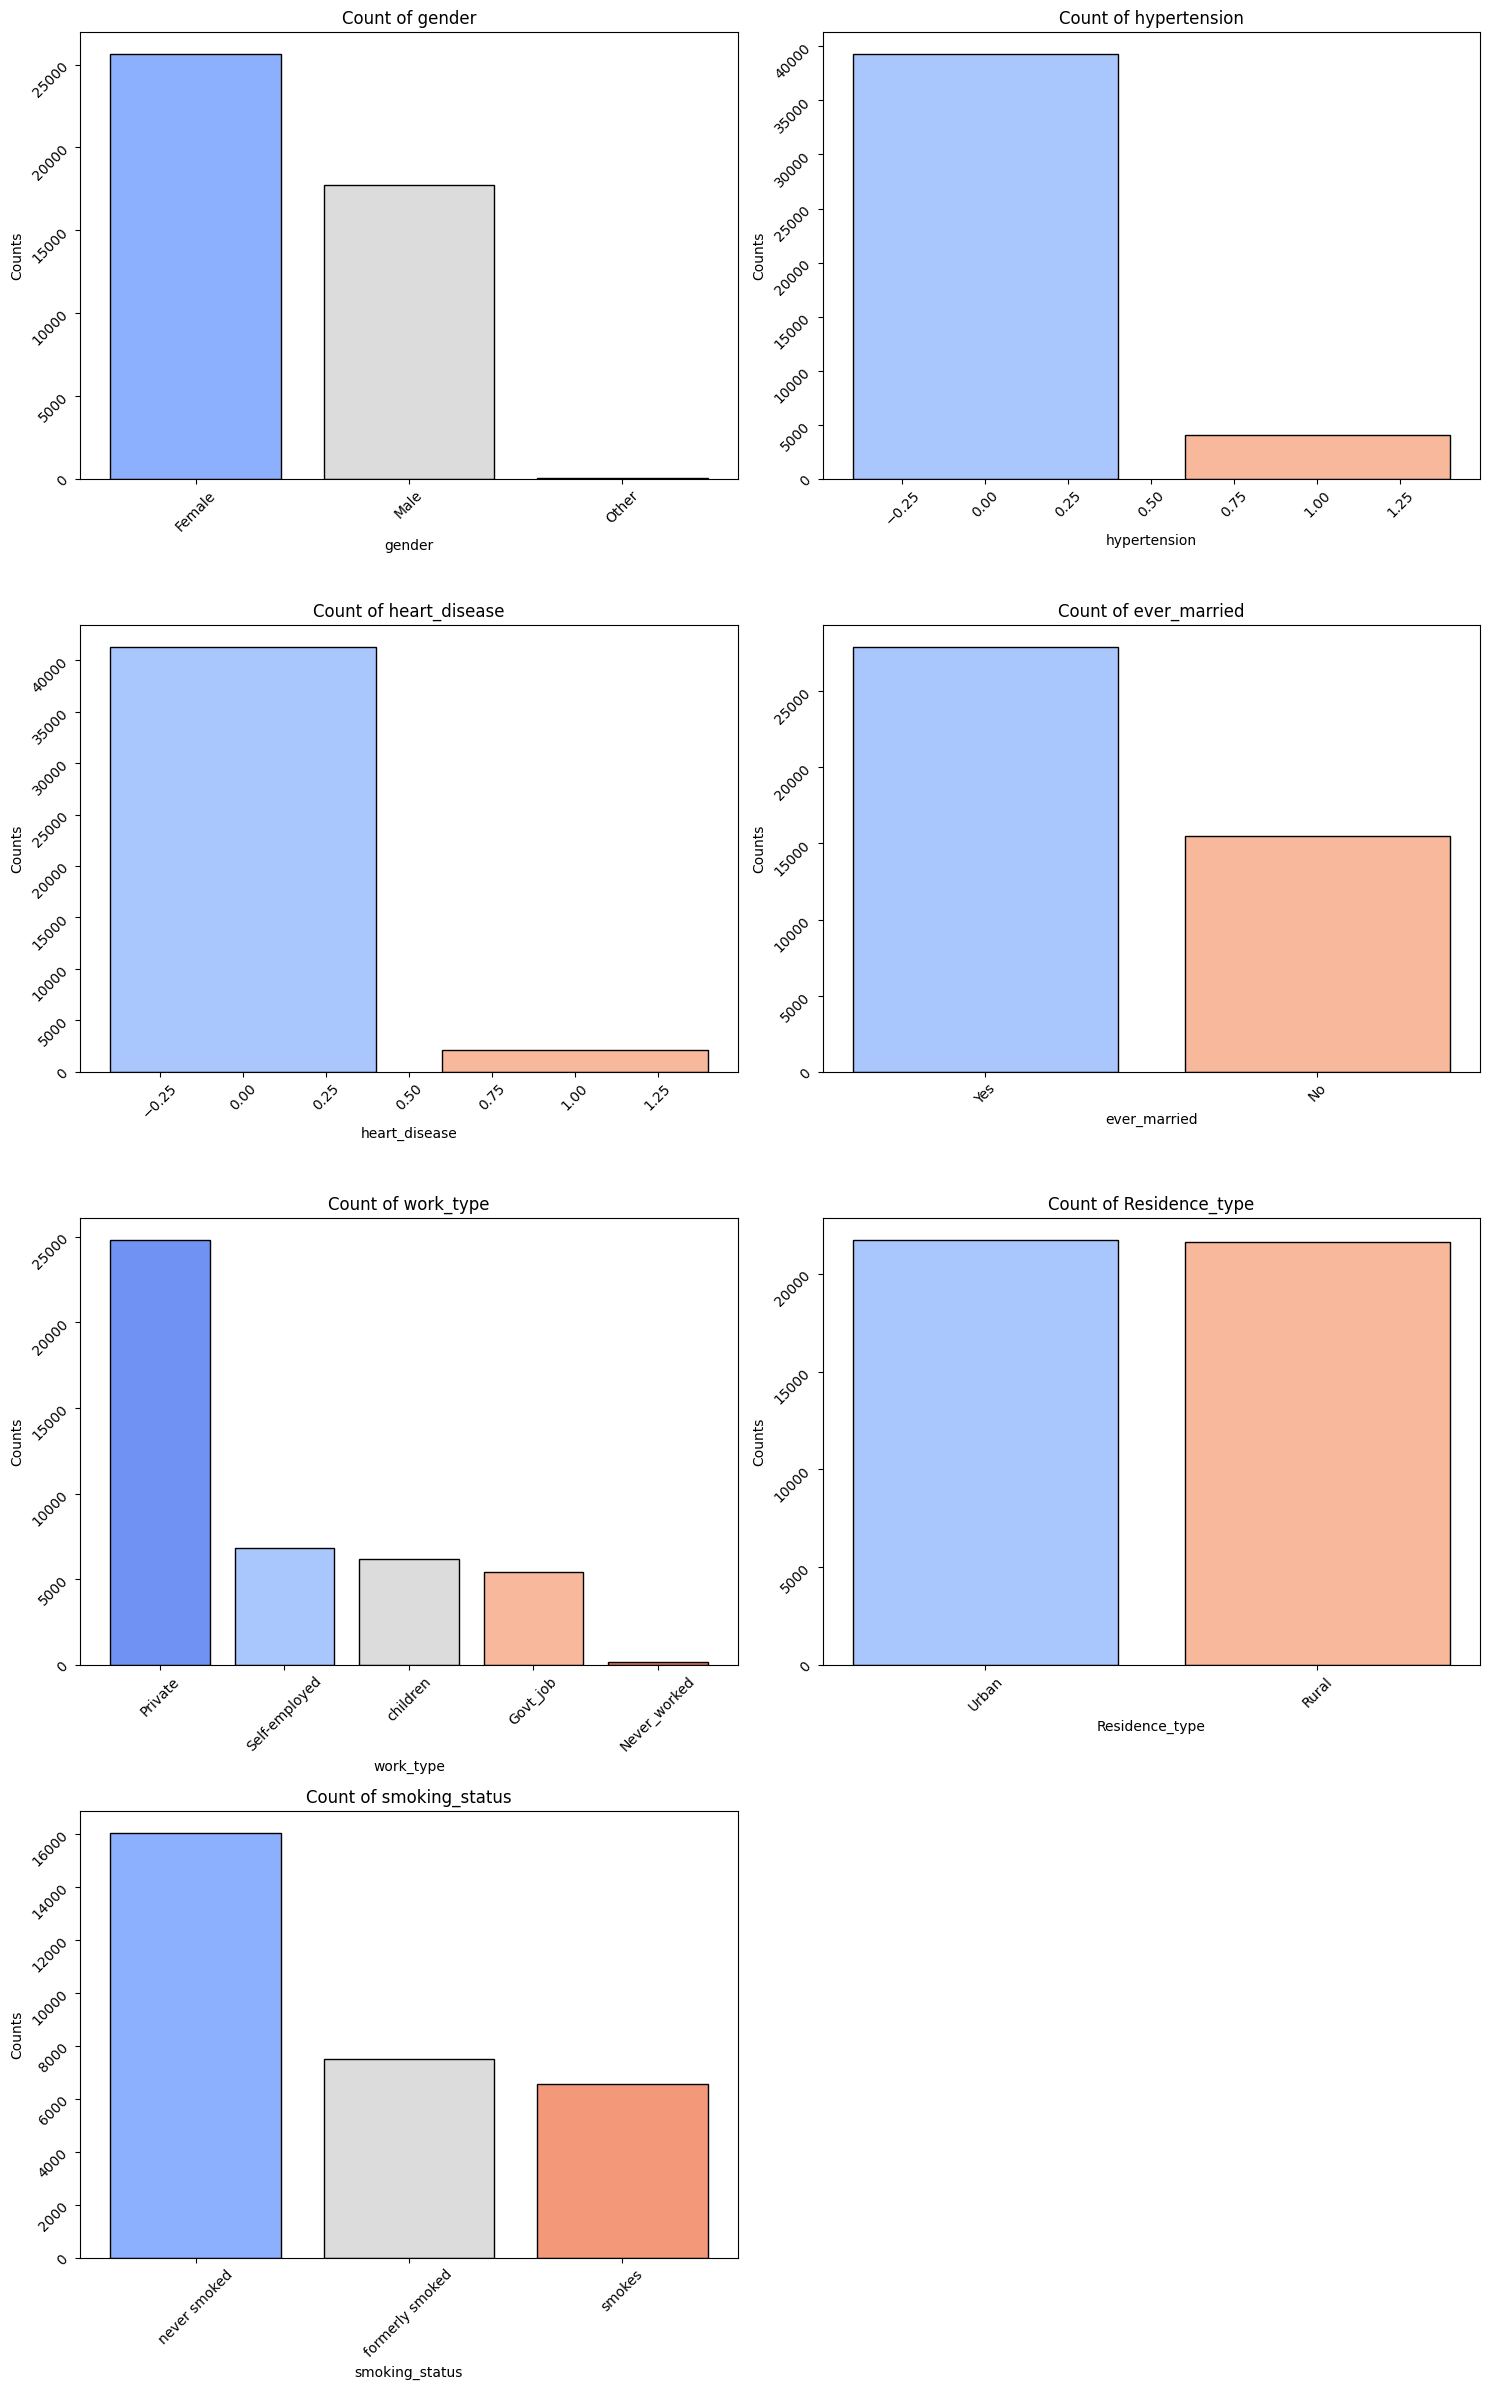

In [11]:
# Select categorical columns
categorical= ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 24))
axes = axes.flatten()

# Looping to make the graph
for i, feature in enumerate(categorical):

    value_counts = df[feature].value_counts()
    palette = sns.color_palette("coolwarm", n_colors=len(value_counts))

    axes[i].bar(value_counts.index, value_counts.values, color=palette, edgecolor='black')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Count of {feature}')
    axes[i].tick_params(labelrotation=45)

# Hide unused subplots since the number of features is odd
if len(categorical) % 2 != 0:
    axes[-1].axis('off')

# Show result
plt.tight_layout()
plt.show()

- **Gender Distribution**:
    - There are more females than males in the dataset, which is around 28.000 individuals.
    - There are no entries that fall into a third category labeled `Other`.

- **Hypertension**:
    - The majority of the population does not have hypertension, which are almost 40.000 individuals.
    - Only a small fraction have hypertension for around 5.000 individuals

- **Heart Disease**:
    - Similar to hypertension, a large majority do not have heart disease, with the count to almost 40.000.
    - Those with heart disease are significantly fewer, roughly about 2.000 individuals.

- **Marital Status**:
    - A significant majority has been or is currently married, with around 30.000 individuals.
    - The unmarried group is distinctly smaller, approximately 10.000 individuals.
    
- **Work Type**:
    - The majority are employed in private jobs, accounting for about 25.000 individuals.
    - The next largest categories are self-employed and children, with around 8.000 and 5.000 individuals respectively, followed by smaller numbers in Govt_job and nearly negligible in Never_worked.

- **Residence Type**:
    - The distribution between urban and rural residence is nearly even, with urban residents slightly higher at about 22.000 compared to 18.000 in rural areas.

- **Smoking Status**:
    - A large number of individuals have never smoked, totaling about 30.000.
    - Former smokers make up about 10.000, while current smokers are around 5.000.

#### **ii. Count of Categorical Columns based on Stroke**

The next step involves counting the occurrences of unique values in the categorical columns, but focusing specifically on their relationship with the stroke variable.

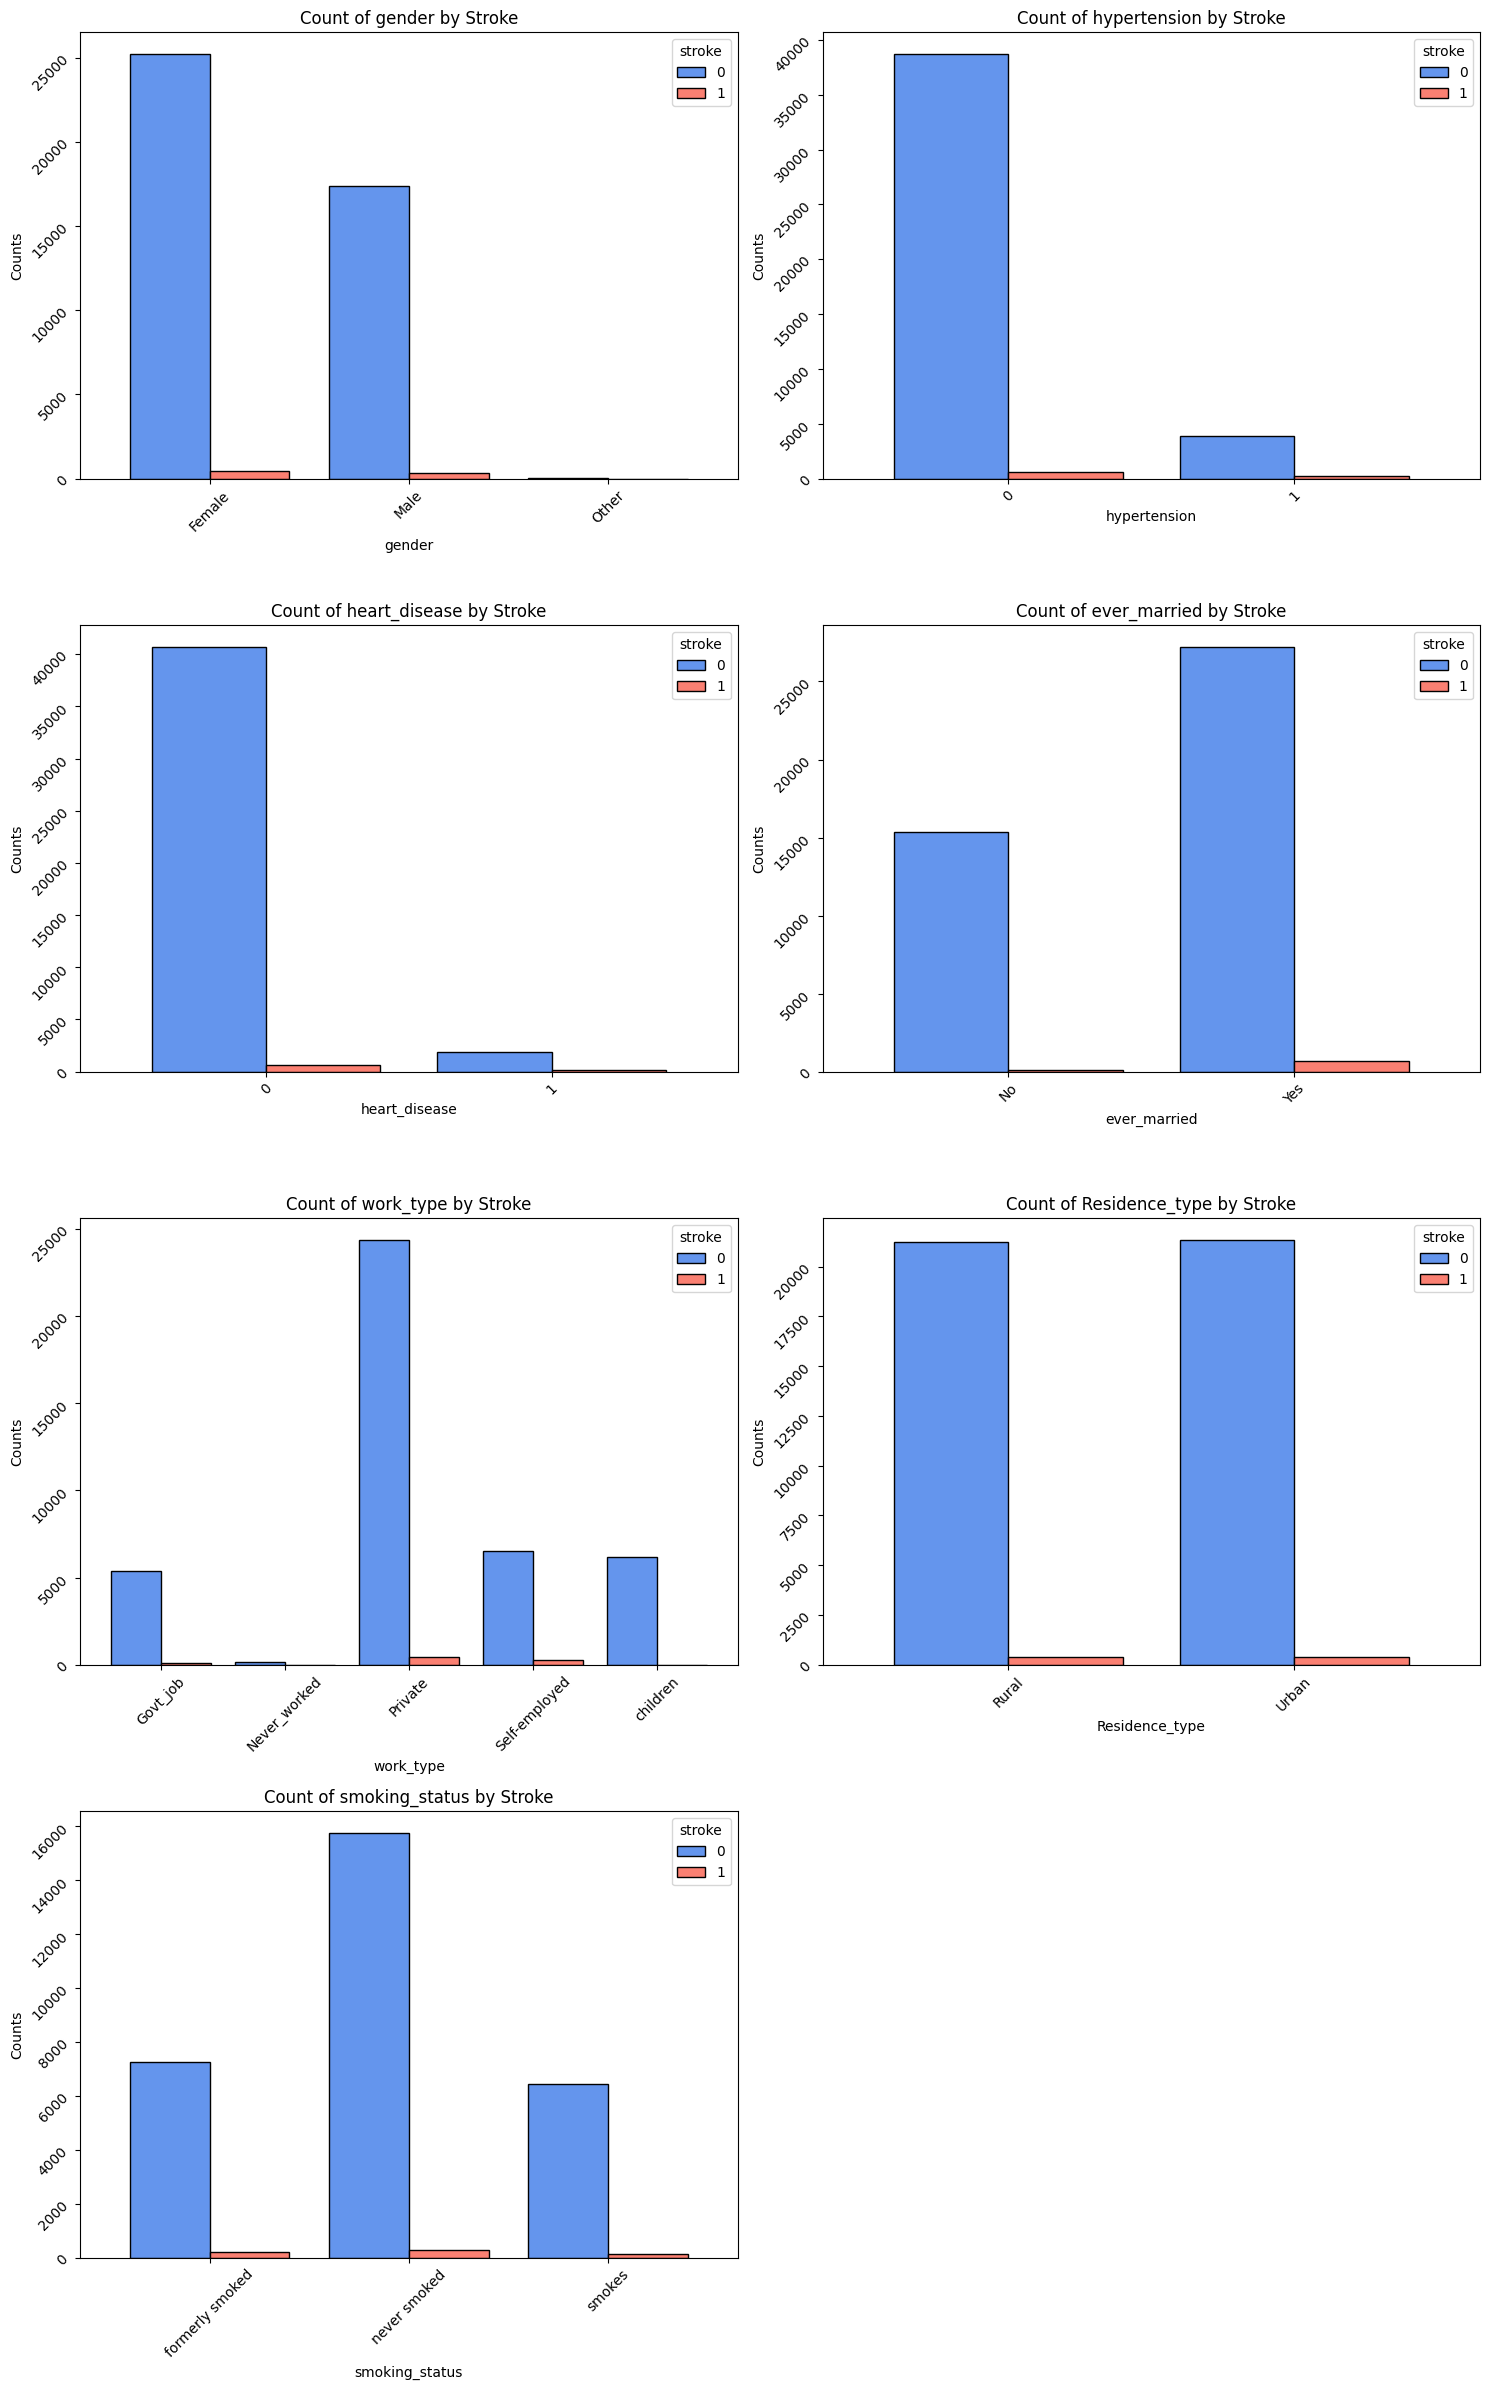

In [12]:
# Create figure and axes
fig, axes = plt.subplots(4, 2, figsize=(15, 24))
axes = axes.flatten()

# Loop to make the graph
for i, feature in enumerate(categorical):
    
    # Creating a dataframe that counts occurrences of categories split by stroke presence
    grouped = df.groupby([feature, 'stroke']).size().unstack(fill_value=0)

    # Plotting
    grouped.plot(kind='bar', ax=axes[i], color=['cornflowerblue', 'salmon'], edgecolor='black', width=0.8)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Count of {feature} by Stroke')
    axes[i].tick_params(labelrotation=45)

# Hide unused subplots if the number of features is odd
if len(categorical) % 2 != 0:
    axes[-1].axis('off')

# Show result
plt.tight_layout()
plt.show()

- **Gender Distribution by Stroke**:
   - Among both genders, a significantly smaller proportion has had a stroke, with females having a slightly higher count of stroke cases compared to males.
   - There are no recorded stroke cases in the `Other` gender category.

- **Hypertension by Stroke**:
   - A clear majority of individuals without hypertension have not experienced a stroke, though a small fraction has.
   - A higher proportion of individuals with hypertension have had a stroke compared to those without, highlighting hypertension as a significant risk factor for stroke.

- **Heart Disease by Stroke**:
   - Similar to hypertension, the majority of individuals without heart disease have not had a stroke.
   - The presence of heart disease significantly increases the likelihood of having a stroke, as indicated by the relative size of the stroke count among those with heart disease.

- **Marital Status by Stroke**:
   - A greater number of married individuals have experienced a stroke compared to those who have never been married, possibly reflecting age-related factors, as married individuals might be older on average.

- **Work Type by Stroke**:
   - Individuals working in private and self-employed categories show higher counts of stroke cases.
   - Government employees, children, and those who have never worked have considerably lower stroke incidence, with very few or no stroke cases among children and never worked categories.

- **Residence Type by Stroke**:
   - Stroke incidence is slightly higher in urban areas compared to rural areas, though the difference is not very pronounced.

- **Smoking Status by Stroke**:
   - Non-smokers show the highest count of individuals who have not experienced a stroke, but also a significant count of stroke cases exists among them.
   - Former smokers have a higher proportion of stroke cases compared to current smokers, which might reflect the cumulative effects of past smoking habits.

#### **iii. Distribution Analysis**

After exploring the categorical columns, the next task is to investigate the distribution of numerical columns.

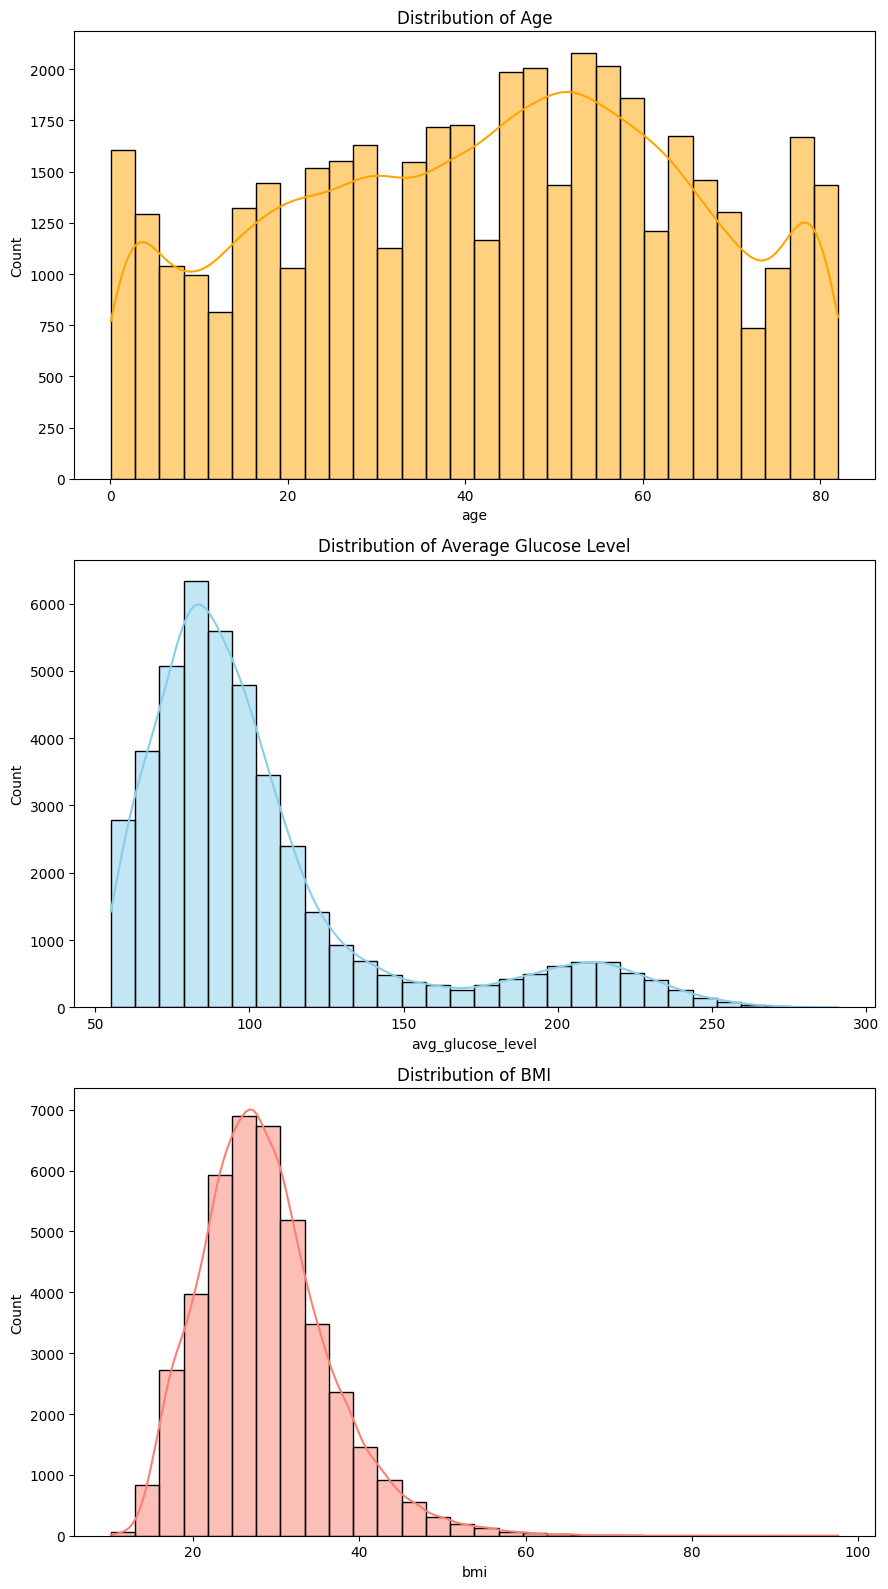

In [13]:
# Create a figure and 3 subplots in 1 column
fig, axes = plt.subplots(3, 1, figsize=(9, 16))

# Plotting histograms for each variable
sns.histplot(df['age'], bins=30, kde=True, color='orange', ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of Age')

sns.histplot(df['avg_glucose_level'], bins=30, kde=True, color='skyblue', ax=axes[1], edgecolor='black')
axes[1].set_title('Distribution of Average Glucose Level')

sns.histplot(df['bmi'], bins=30, kde=True, color='salmon', ax=axes[2], edgecolor='black')
axes[2].set_title('Distribution of BMI')

# Show result
plt.tight_layout()
plt.show()

- **Distribution of Age**:
    - The age distribution is fairly wide, spanning from young to the elderly. There are two main groups where many people fall: in their late 20s and another smaller group in their late 50s.
    - Fewer people are shown in the older age groups, especially past 60 years.

- **Distribution of Average Glucose Level**:
    - The distribution of average glucose levels is approximately normally distributed, with a peak around 100 mg/dL, which is typical for a healthy adult population.
    - The tail extending towards higher glucose levels suggests a subset of the population with elevated glucose levels, potentially indicating diabetes or pre-diabetic conditions.

- **Distribution of BMI**:
    - The BMI distribution is roughly normal but slightly right-skewed, indicating that more individuals have a BMI above the mean than below it.
    - The peak of the distribution is around a BMI of 28, which is categorized as overweight. This suggests that a significant portion of the population is overweight or obese.

#### **iv. Correlation Analysis**

The next step is to explore the correlation between the numerical columns to understand their relationships.

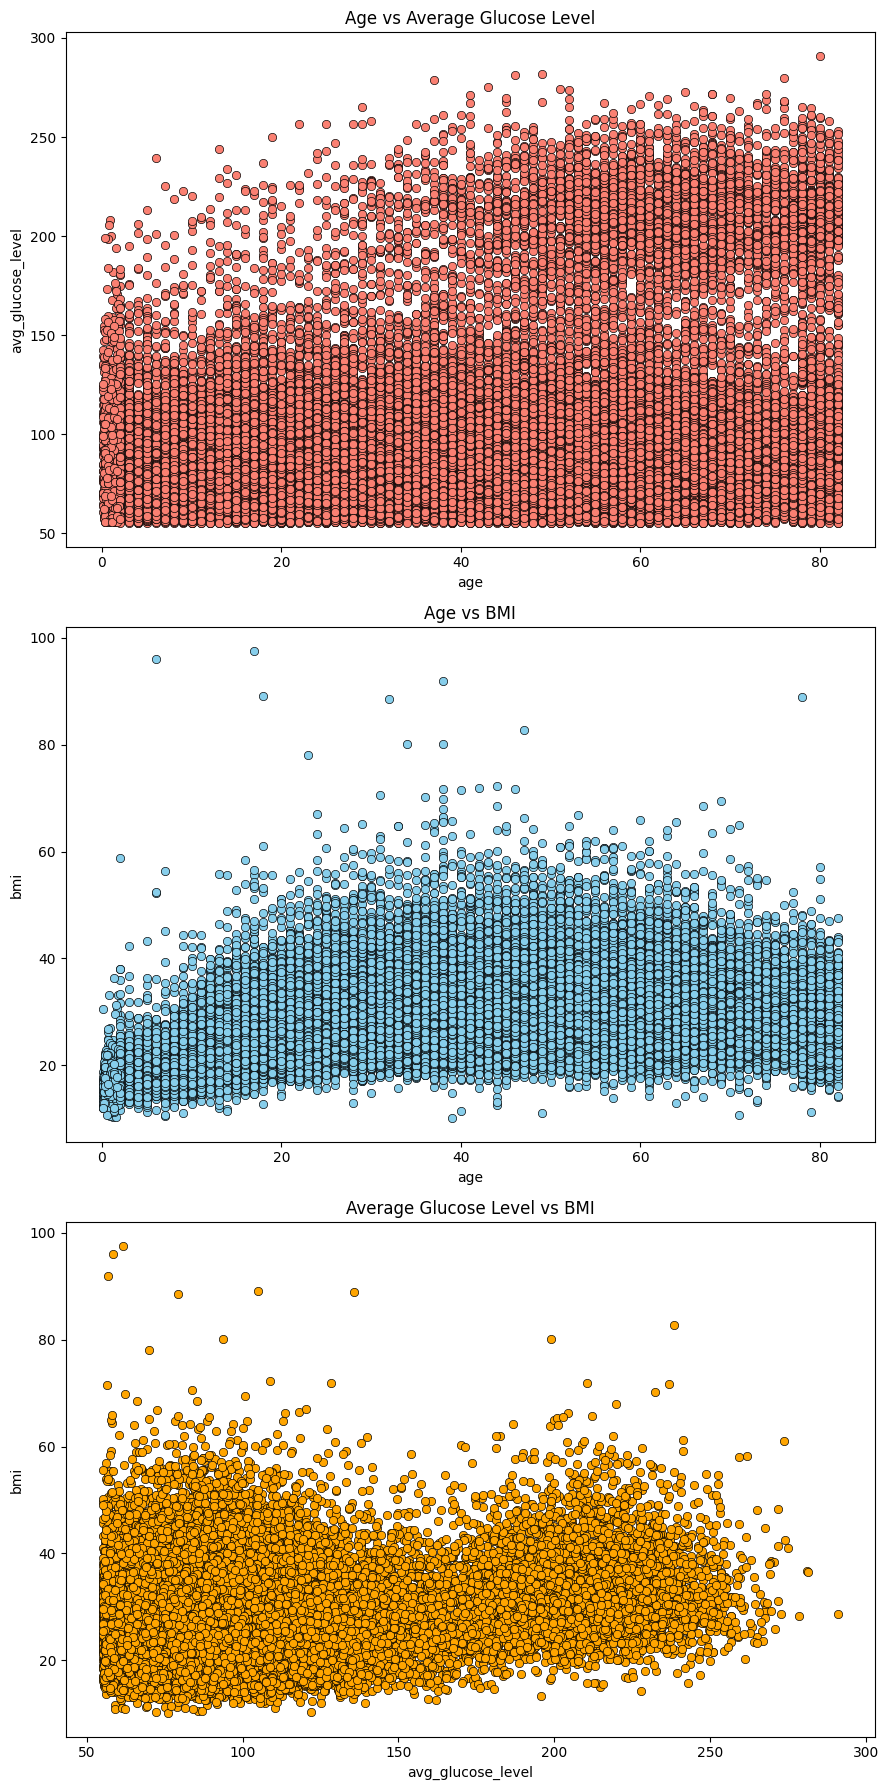

In [14]:
# Select numerical columns
num = df[['age', 'avg_glucose_level', 'bmi']]

# Create a figure with 3 subplots arranged in 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(9, 18))

# Scatter plot for 'age' vs 'avg_glucose_level'
sns.scatterplot(x='age', y='avg_glucose_level', data=num, ax=axs[0], color='salmon', edgecolor='black')
axs[0].set_title('Age vs Average Glucose Level')
axs[0].grid(False) 

# Scatter plot for 'age' vs 'bmi'
sns.scatterplot(x='age', y='bmi', data=num, ax=axs[1], color='skyblue', edgecolor='black')
axs[1].set_title('Age vs BMI')
axs[1].grid(False) 

# Scatter plot for 'avg_glucose_level' vs 'bmi'
sns.scatterplot(x='avg_glucose_level', y='bmi', data=num, ax=axs[2], color='orange', edgecolor='black')
axs[2].set_title('Average Glucose Level vs BMI')
axs[2].grid(False) 

# Show result
plt.tight_layout()
plt.show()

- **Age vs Average Glucose Level**:
    - For most age groups, average glucose levels seem to cluster around 50 to 150 mg/dL. This indicates a normal range for a large portion of the population.
    - There is a number of higher glucose level outliers, particularly in older age groups. This suggests that higher glucose levels could be more common as people age, or it could indicate instances of diabetes or pre-diabetes in older individuals.

- **Age vs BMI**:
    - BMI appears to increase with age, especially until around age 60, after which it either stable or slightly decreases. This could be due to a decrease in muscle mass or changes in lifestyle as people age.
    - There's a wide range of BMI values across all age groups, but the density of the points suggests that most individuals fall into the overweight category (BMI of 25-30).

- **Average Glucose Level vs BMI**:
    - There doesn’t seem to be a strong direct correlation between BMI and average glucose levels, as the data points are widely spread. However, there is a dense clustering of data points in the range of BMI from about 20 to 40 and glucose levels from 50 to 150 mg/dL.
    - Individuals with very high BMI tend to also have higher glucose levels, suggesting a potential link between obesity and elevated glucose levels, which can be a risk factor for diabetes.

#### **v. Percentages of Stroke**

The final step is to explore the distribution of strokes, as the target variable.

In [15]:
# Count stroke
stroke_counts = df['stroke'].value_counts()

# Define labels and colors
labels = ["Non-Stroke", "Stroke"]
colors = ["skyblue", "salmon"]

# Create pie chart
fig = px.pie(values=stroke_counts, names=labels, width=600, height=550, color_discrete_sequence=colors)
fig.update_layout(title={'text': "Stroke Percentages",
                         'y':0.95,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'})

# Show result
fig.show()

The pie chart shows the distribution of stroke occurrences in the dataset.

- Non-Stroke: 98.2% of the dataset, representing for 42.617 individuals, have not experienced a stroke.
- Stroke: Only 1.8% of the dataset, representing a much smaller group which is 783 individuals, has had a stroke.

This visualization highlights that strokes are relatively rare in the dataset. It also reveals an imbalance in the data, with strokes being the target variable, indicating the need for later handling of data imbalance.

### **E. Feature Engineering**

After thoroughly exploring and gaining a better understanding of the data, the next step is to preprocess the data by selecting only the relevant features before training the model. These features also need to be transformed to ensure they are in a suitable format for model training.

#### **i. Split X (Features) and y (Target)**

The first step is to split between the features and target to separate the predictor variables from the target variable.

In [16]:
# Split between X and y
X = df.drop(['stroke'], axis=1)
y = df.stroke

In [17]:
# Print X
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN
...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked


In [18]:
# Print y
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

Now, X contains the features, while y contains the `stroke` column only as the target variable.

#### **ii. Split Train-Set and Test-Set**

After splitting `X` and `y`, the next step is to separate the data into training and testing sets to evaluate the model's performance.

In [19]:
# Splitting train-set and test-set using 'Train_test_split'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print train and test shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

# Show one of the variable 
X_train.head()

Train Size : (30380, 10)
Test Size : (13020, 10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5473,Male,7.0,0,0,No,children,Rural,102.78,18.1,NaN
26630,Female,53.0,0,1,No,Private,Urban,94.68,NaN,never smoked
17083,Male,26.0,0,0,No,Private,Rural,88.28,36.3,never smoked
4730,Male,7.0,0,0,No,children,Urban,77.12,18.6,NaN
19154,Female,44.0,0,0,Yes,Private,Urban,84.55,44.5,NaN


The data is split into training and testing sets using `train_test_split` with a test size of 0.3, meaning the training set now contains 70% of the data, or 30.380 rows, while the test set contains 30% of the data, or 13.020 rows. **Stratify** is used to ensure an even split between stroke and non-stroke data during the splitting process.

#### **iii. Missing Value Handling**

As previously mentioned, handling the missing values in the dataset is crucial to ensure data completeness and accuracy in further analyses or modeling tasks. Before addressing the missing values in the dataset, it's crucial to first determine the nature or type of these missing values.

In [20]:
# Printing rows where 'bmi' is null
null_bmi = df[df['bmi'].isnull()]
null_bmi[0:20]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
95,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
113,Female,76.0,1,0,Yes,Self-employed,Urban,209.58,NaN,never smoked,0
186,Female,63.0,0,0,Yes,Govt_job,Rural,79.92,NaN,smokes,0
231,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,NaN,NaN,0
233,Male,54.0,1,0,Yes,Private,Rural,198.69,NaN,smokes,0
278,Male,40.0,0,0,Yes,Private,Rural,89.77,NaN,smokes,0
407,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,NaN,1
429,Female,48.0,1,0,No,Private,Rural,118.14,NaN,formerly smoked,0
432,Male,61.0,0,1,Yes,Private,Urban,88.27,NaN,never smoked,0


In [21]:
# Printing rows where 'smoking_status' is null
null_smoking = df[df['smoking_status'].isnull()]
null_smoking[0:20]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
10,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
20,Female,65.0,1,0,Yes,Private,Rural,75.70,41.8,NaN,0
30,Male,27.0,0,0,Yes,Self-employed,Urban,82.90,25.0,NaN,0
31,Female,47.0,0,0,Yes,Private,Urban,103.26,25.4,NaN,0
33,Female,3.0,0,0,No,children,Urban,73.74,16.0,NaN,0
34,Female,58.0,0,0,Yes,Private,Urban,149.75,27.0,NaN,0


Based on these observations, it appears that there is **no clear pattern** or association between the missing values in `bmi` and `smoking_status` and other variables like age group, work type, marital status, or residence type. This suggests that the missingness in `bmi` and `smoking_status` could be closer to **Missing Completely at Random (MCAR)**.

After identifying the type of missing values, the next step is to decide on the method for handling them. While there are various methods available, such as dropping missing values or imputing them with mean, median, or mode values, it's important to note that deleting missing values can reduce sample size, introduce bias, and lead to information loss. Therefore, the preferred approach will be **imputation**.

[Reference](https://www.linkedin.com/advice/0/what-some-best-practices-dealing-missing-values-imputation)

Mean is suitable for normally distributed data, while median is preferable for skewed distributions, and mode is appropriate for categorical data. Skewness is a useful measure for checking the distribution of data.

In [22]:
# Check skewness
X_train['bmi'].skew()

0.9133963266435324

Based on the analysis, it can be concluded that the `bmi` column shows skewness, suggesting that it should be imputed using the **median**. On the other hand, `smoking_status` column which is a categorical column is imputed using the **mode** value.

The `SimpleImputer` method is used for automatic imputation of missing values for both training and testing set.

In [23]:
# Define imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numeric columns
X_train[['bmi']] = median_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = median_imputer.fit_transform(X_test[['bmi']])

# Apply imputation to categorical columns
X_train[['smoking_status']] = mode_imputer.fit_transform(X_train[['smoking_status']])
X_test[['smoking_status']] = mode_imputer.fit_transform(X_test[['smoking_status']])

In [24]:
# Check missing value in X_train
X_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [25]:
# Check missing value in X_test
X_test.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [26]:
# Check missing value in y_train
y_train.isnull().sum()

0

In [27]:
# Check missing value in y_test
y_test.isnull().sum()

0

The result indicates that after using the `SimpleImputer` method, the variables `X_train`, `y_train`, `X_test`, and `y_test` no longer contain any missing values.

#### **iv. Outlier Handling**

After handling the missing values, addressing outliers is necessary because outliers can significantly impact the accuracy and reliability of statistical analyses and machine learning models.

The initial step involves selecting which columns to handle for outlier detection and treatment. Categorical columns are typically excluded from outlier handling as they don't have numerical values. Additionally, numerical columns with minimal unique values are not handled since their limited variability may be meaningful for the analysis.

In [28]:
# Check total unique values
X_train.nunique()

gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    10908
bmi                    534
smoking_status           3
dtype: int64

Since all the numerical columns have many unique values, it's appropriate to handle outliers in all of these columns. The first step is to check the skewness of each column to determine whether they follow a normal, skewed, or extremely skewed distribution.

In [29]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Calculate skewness of all numeric columns
skewness_results = check_skewness(X_train, 'age', 'avg_glucose_level', 'bmi')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

age: -0.10117804448863003
avg_glucose_level: 1.6915059822297436
bmi: 0.9397425030453765


In [30]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['age']
Skewed: ['bmi']
Extreme Skewed: ['avg_glucose_level']


The `age` column follows a normal distribution, while the `bmi` column follows a skewed distribution, and the `avg_glucose_levels` column follows an extremely skewed distribution.

##### **1. Before Handling**

In [31]:
# Create function to calculate outlier percentages
def calculate_outlier_percentages(df, columns, method='normal', distance=1.5):
    for variable in columns:
        if method == 'normal':
            std_dev = df[variable].std()
            mean_val = df[variable].mean()
            lower_boundary = mean_val - (3 * std_dev)
            upper_boundary = mean_val + (3 * std_dev)
        elif method == 'skew':
            IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
            lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
            upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# For extreme skewed columns
calculate_outlier_percentages(X_train, normal_columns)
calculate_outlier_percentages(X_train, skewed_columns, method='skew')
calculate_outlier_percentages(X_train, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in age: 0.00%
Percentage of outliers in bmi: 2.46%
Percentage of outliers in avg_glucose_level: 4.43%


Before handling, column `age` has no outliers, `bmi` has 2.46% outliers, and `avg_glucose_level` has 4.43% outliers.

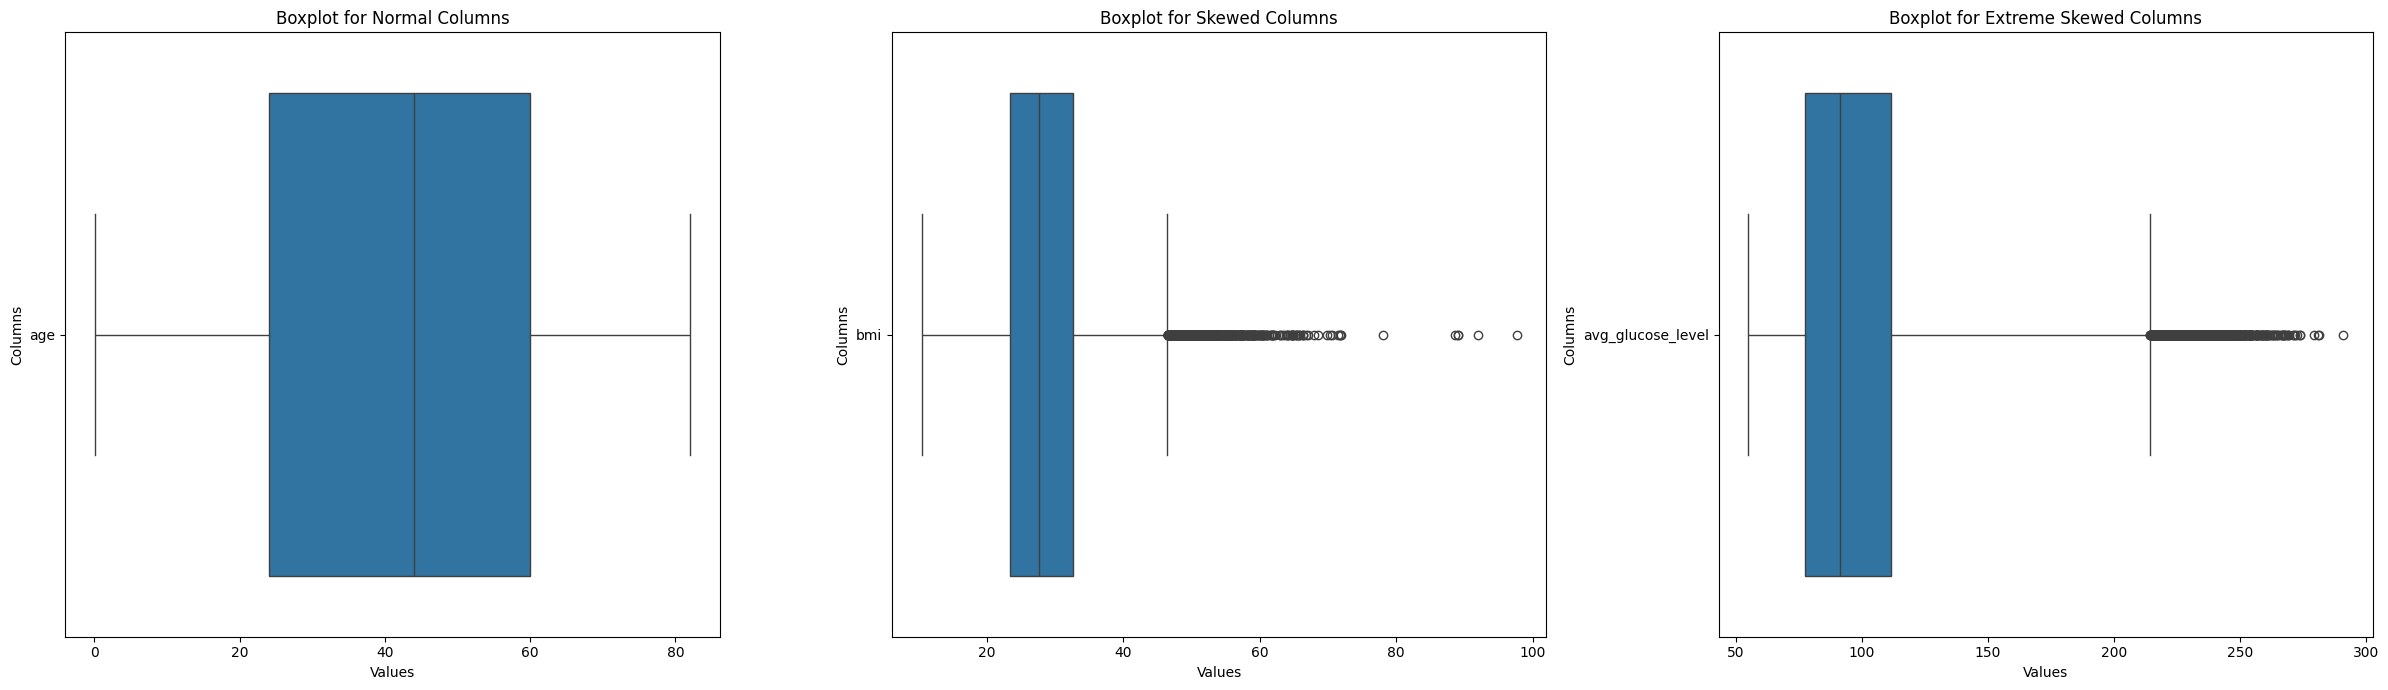

In [32]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Boxplot for normal columns
sns.boxplot(data=X_train[normal_columns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for skewed columns
sns.boxplot(data=X_train[skewed_columns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train[extreme_skewed_columns], orient="h", whis=3, ax=axes[2])
axes[2].set_title("Boxplot for Extreme Skewed Columns")
axes[2].set_xlabel("Values")
axes[2].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

The boxplot reveals outliers through circles outside the box. It indicates no outliers in the `age` column but does show outliers in the `bmi` and `avg_glucose_level` columns.

##### **2. After Handling**

Outliers will be managed using the **Winsorizer** method, where outlier values are capped with either the maximum or minimum value of the columns. This method is advantageous because it allows for adjustments to extreme values without completely removing them from the dataset, thus avoiding potential data loss.

In [33]:
# Create function to apply winsorization to extreme skewed distributed columns 
def apply_winsorization(df, variables, capping_method='iqr', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(df)
    return train_capped

# Apply to X_train column
X_train = apply_winsorization(X_train, skewed_columns, fold=1.5)
X_train = apply_winsorization(X_train, extreme_skewed_columns)

In [34]:
# Calculate after handling outliers
calculate_outlier_percentages(X_train, normal_columns)
calculate_outlier_percentages(X_train, skewed_columns, method='skew')
calculate_outlier_percentages(X_train, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in age: 0.00%
Percentage of outliers in bmi: 0.00%
Percentage of outliers in avg_glucose_level: 0.00%


After handling, all of the columns now have 0.00% of outliers.

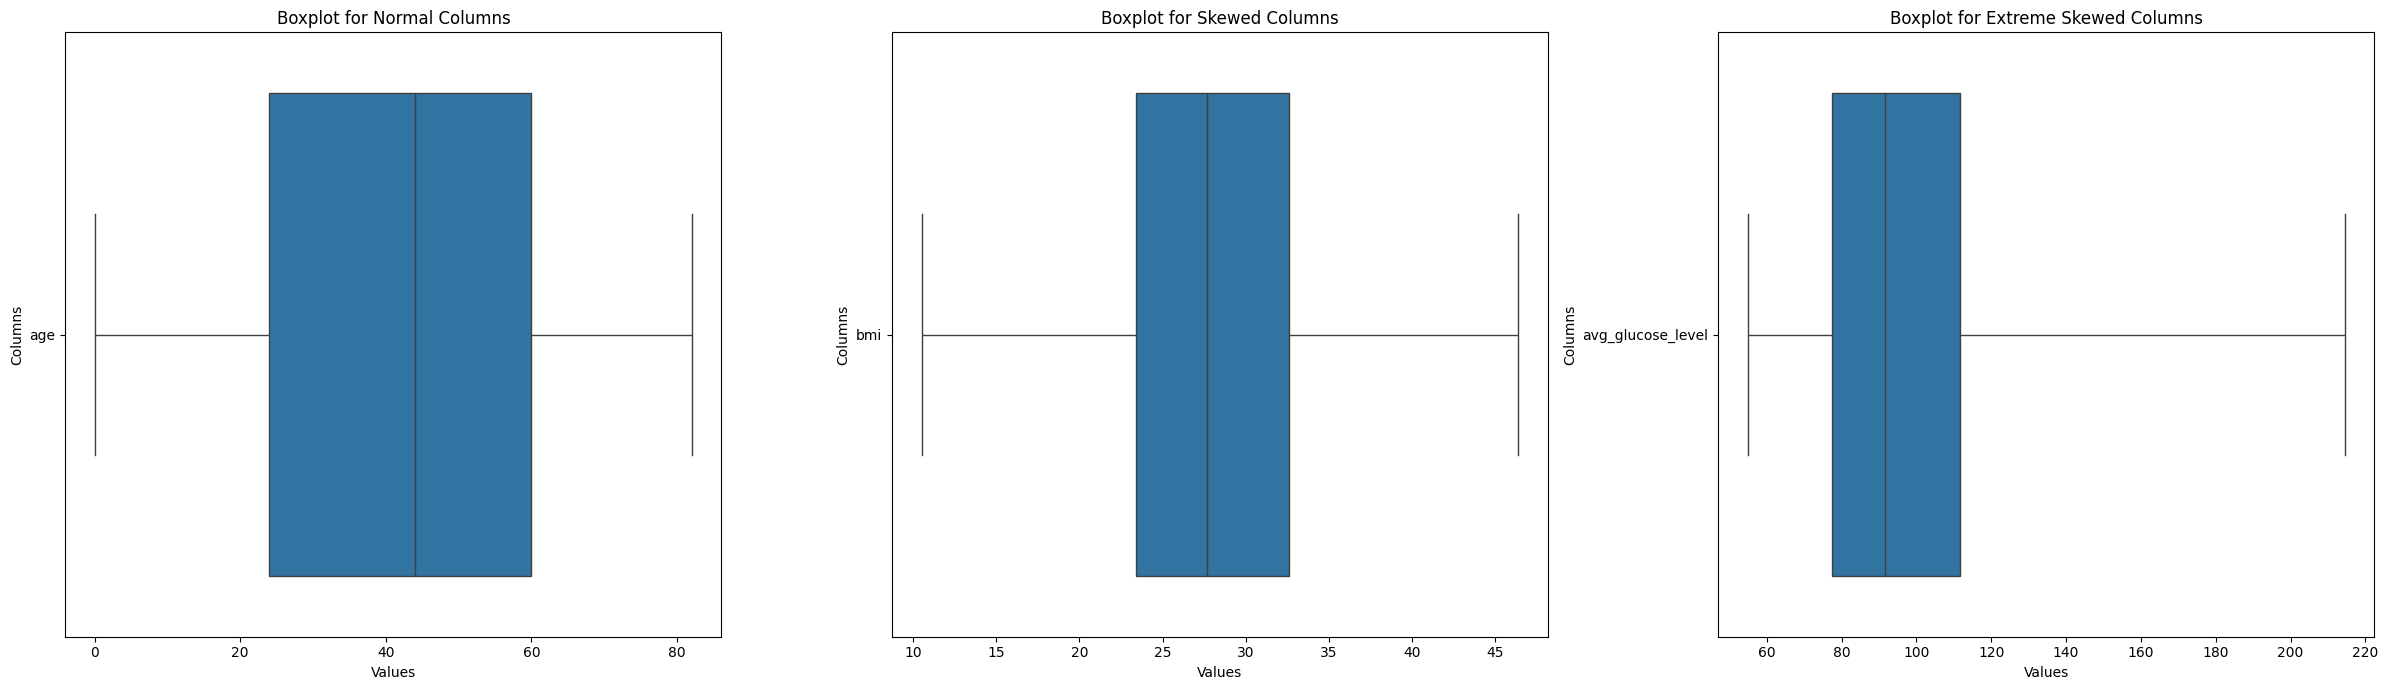

In [35]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# Boxplot for normal columns
sns.boxplot(data=X_train[normal_columns], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Normal Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for skewed columns
sns.boxplot(data=X_train[skewed_columns], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train[extreme_skewed_columns], orient="h", whis=3, ax=axes[2])
axes[2].set_title("Boxplot for Extreme Skewed Columns")
axes[2].set_xlabel("Values")
axes[2].set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

The absence of circles outside the box in the boxplot indicates that there are no outliers present in the data after applying the Winsorizer method.

#### **v. Feature Selection**

The next step involves selecting only the features that have correlations with the target variable. This analysis uses two methods:

- **Phik Correlation**: Phik identifies correlations between features and the target variable. In this analysis, Phik will be used to select categorical features.

- **PCA (Principal Component Analysis)**: PCA is a dimension reduction method that retains only significant information. In this analysis, PCA will be included in a Pipeline to select numerical features.

However, this section will exclusively focus on the Phik correlation method for selecting categorical features since the PCA will be perfomed in a Pipeline. To perform the Phik correlation, the next step involves concatenating the `X_train` and `y_train` datasets again.

In [36]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5473,Male,7.0,0,0,No,children,Rural,102.78,18.1,never smoked,0
26630,Female,53.0,0,1,No,Private,Urban,94.68,27.7,never smoked,0
17083,Male,26.0,0,0,No,Private,Rural,88.28,36.3,never smoked,0
4730,Male,7.0,0,0,No,children,Urban,77.12,18.6,never smoked,0
19154,Female,44.0,0,0,Yes,Private,Urban,84.55,44.5,never smoked,0


In [37]:
# Create function to correlate features with stroke
def compute_phik_correlation(df, columns):
    subset = df[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix['stroke']

# Define the list of columns for each subset
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns)

# Print result
print(correlation)

interval columns not set, guessing: ['hypertension', 'heart_disease', 'stroke']
gender            0.004643
hypertension      0.111290
heart_disease     0.205301
ever_married      0.109776
work_type         0.061297
Residence_type    0.000000
smoking_status    0.023753
stroke            1.000000
Name: stroke, dtype: float64


The result displays the correlation between all categorical features and the target variable `stroke`. The scores range from 0 to 1, where 0 signifies no relationship and 1 indicates a strong relationship. For this analysis, a threshold of **0.2** has been selected. features with scores > 0.2 indicate a relationship with stroke, while those < 0.2 do not. Therefore, the variable chosen based on this threshold will be `heart disease` from the categorical features.

The features that do not show any relationship with `stroke` will be dropped from both `X_train` and `y_train` datasets.

In [38]:
# # Drop unnecessary columns in X_train
X_train.drop(['ever_married', 'hypertension', 'gender', 'work_type', 'Residence_type', 'smoking_status'], axis=1,  inplace=True)

# # Drop unnecessary columns in X_test
X_test.drop(['ever_married', 'hypertension', 'gender', 'work_type', 'Residence_type', 'smoking_status'], axis=1,  inplace=True)

In [39]:
# # Show columns
print(X_train.columns)
print(X_test.columns)

Index(['age', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Index(['age', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


The `X_train` and `y_train` dataset now only contains categorical features that have correlation with `stroke` and numerical features that haven't been choosen yet.

#### **vi. Cardinality Check**

After selecting the categorical features based on their correlation with the target variable, the next step is to check for high cardinality. High cardinality in categorical variables means that they have many unique values, typically greater than 10. Columns with high cardinality need to be handled by grouping them into smaller categories to ensure they have fewer than 10 unique values.

In [40]:
# Check number of unique values in categorical columns
print('Number of categories in the variable heart_disease  : {}'.format((X_train.heart_disease.nunique())))

Number of categories in the variable heart_disease  : 2


Since the selected categorical features only have 2 unique values, there is no need for cardinality handling.

#### **vii. Imbalance Data Handling**

As previously mentioned, the target variable is highly imbalanced, with the `stroke` class accounting for approximately 1% of the data and the `non-stroke` class representing 99%. Imbalanced data can lead to model bias towards the majority class.

To address this, the **Random Under Sampler** method will be used. This method involves randomly selecting samples from the majority class (non-stroke) to match the number of samples in the minority class (stroke). By doing so, it helps balance the class distribution and mitigate bias towards the majority class, allowing the model to better learn from the minority class.

In [41]:
# Define RandomUnderSampler to handle imbalance data
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=5)

# Resample training data using RandomUnderSampler
X_resample, y_resample = undersampler.fit_resample(X_train, y_train)

The Random Under Sampler method is applied **only to the training set**. Testing data is not transformed to maintain the model's ability to predict outcomes accurately from real-world data.

In [42]:
# Print value counts after sampling
print('Non-Stroke:', y_resample.value_counts()[0], '/', round(y_resample.value_counts()[0]/len(y_resample) * 100,2), '% of the dataset')
print('Stroke:', y_resample.value_counts()[1], '/',round(y_resample.value_counts()[1]/len(y_resample) * 100,2), '% of the dataset')

Non-Stroke: 548 / 50.0 % of the dataset
Stroke: 548 / 50.0 % of the dataset


After applying undersampling, the training set now contains 1.096 rows, with **548** instances of stroke and **548** instances of non-stroke. This indicates that the data is now balanced.

#### **viii. Split Numerical and Categorical Columns**

To proceed with feature transformation, the variables are now separated based on their data types and distribution. This separation is necessary because each variable requires a different transformation method.

In [43]:
# Split numerical and categorical columns

num_normal = ['age']
num_skew = ['avg_glucose_level', 'bmi']
cat_encoded = ['heart_disease']

print(f'Numerical normal columns:\n{num_normal}')
print(f'Numerical skew columns:\n{num_skew}')
print(f'Categorical encoded columns:\n{cat_encoded}')

Numerical normal columns:
['age']
Numerical skew columns:
['avg_glucose_level', 'bmi']
Categorical encoded columns:
['heart_disease']


#### **ix. Feature Transformation**

After defining the variables, the next step is the transformation process. In this section, several transformations are applied:

- Numerical columns with a normal distribution will be scaled using StandardScaler.
- Numerical columns with a skewed distribution will be scaled using MinMaxScaler.
- Categorical columns are already encoded so it will be passed as they are.

In [44]:
# Preprocessing using ColumnTransformer

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
pca = PCA(n_components=0.95, random_state=0)

preprocess = ColumnTransformer(transformers = [
            ('num_normal', scaler_std, num_normal),
            ('num_skew', scaler_minmax, num_skew),
            ('pca', pca, num_normal + num_skew)],
            remainder='passthrough')

All transformations are done within the `ColumnTransformer`, which includes scalers and PCA. After scaling, both dimensions in numerical columns will be reduced using PCA, as previously mentioned.

In [45]:
# Fit the preprocess pipeline to training data
preprocess.fit(X_resample, y_resample)

# Print the number of components used by PCA
pca_component_count = preprocess.named_transformers_['pca'].n_components_
print("Number of components used by PCA:", pca_component_count)

Number of components used by PCA: 2


To retain 95% of the information in the numerical columns, PCA will use 2 components.

### **F. Model Definition**

Once all features have been preprocessed, the analysis proceeds to model definition. Six models are used in this analysis and here are the reasons:

- **KNN (K-Nearest Neighbors)**: Suitable for data that does not make strong assumptions about the data's distribution.
- **SVC (Support Vector Classifier)**: Effective for both linearly and non-linearly separable data, making it versatile for this dataset.
- **Logistic Regression**: Simple yet robust model that provides interpretable results and is suitable for binary classification tasks.
- **Decision Tree**: Beneficial for capturing complex relationships in the data and is easily interpretable.
- **Random Forest**: An ensemble bagging method that combines multiple decision trees to improve accuracy and reduce overfitting.
- **XGBoost**: Powerful gradient boosting algorithm known for its capability to handle imbalanced data, making it suitable for this analysis.

The analysis primarily focuses on **Recall** as the main scoring metric due to the objective of developing a model capable of accurately predicting stroke cases. Minimizing False Negatives, where the model predicts non-stroke but the actual outcome is stroke, is crucial. Thus, **Recall** is prioritized over Precision.

Although aiming for a higher **Recall** may reduce Precision due to increased False Positives, this tradeoff is inevitable. A higher False Positive rate means more misclassification of non-stroke cases as stroke, potentially inconveniencing individuals. However, whether this tradeoff is acceptable depends on the business goals and desired accuracy. In this scenario, prioritizing higher **Recall** to capture more stroke cases is preferred, even if it leads to a lower Precision.

In [46]:
# Define model using pipeline

pipe_knn = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', KNeighborsClassifier(n_neighbors=9))])
pipe_svc = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', SVC())])
pipe_log = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', LogisticRegression())])
pipe_dt = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', DecisionTreeClassifier(max_depth=3, random_state=41))]) 
pipe_rf = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', RandomForestClassifier(max_depth=3, random_state=41))])
pipe_xgb = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', XGBClassifier(max_depth=3, random_state=41))])

KNN requires defining the number of neighbors (n_neighbors) to ensure fairness with other models because KNN can tend to achieve a score of 1. Similarly, for decision tree-based algorithms like Decision Tree, Random Forest, and XGBoost, specifying the maximum depth (max_depth) is essential to prevent overfitting and ensure fairness with other models in the cross validation section.

### **G. Model Training**

The best model among the 6 is determined using **cross-validation**, a technique to evaluate a model's performance and generalization. It involves dividing the dataset into subsets, training on some data, and testing on the rest, repeated multiple times to evaluate performance on unseen data and avoid overfitting.

The cross-validation uses `StratifiedKFold` function since it maintains the class distribution in each fold, ensuring that each fold has a representative mix of target classes.

In [47]:
# Setup the cross-validation framework with Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [48]:
# Training using Cross Validation
cv_knn = cross_val_score(pipe_knn, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1) 
cv_svc = cross_val_score(pipe_svc, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1) 
cv_log = cross_val_score(pipe_log, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1)
cv_xgb = cross_val_score(pipe_xgb, X_resample, y_resample, cv=kf, scoring='recall', n_jobs=-1)

In [49]:
# Find best model from Cross Validation
model = []
cv_score = 0

for cv, name in zip([cv_log, cv_svc, cv_knn, cv_dt, cv_rf, cv_xgb],
                    ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    print(name)
    print('Recall - All - Cross Validation', cv)
    print('Recall - Mean - Cross Validation', cv.mean())
    print('Recall - Std - Cross Validation:', cv.std())
    print('Recall - Range - Cross Validation', (cv.mean() - cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        model = name
    else:
        pass
    
print('Best Model:', model)
print('Cross Validation Mean from Best Model:', cv_score)

Logistic Regression
Recall - All - Cross Validation [0.82727273 0.81651376 0.88073394 0.73636364 0.81818182]
Recall - Mean - Cross Validation 0.8158131776480401
Recall - Std - Cross Validation: 0.04618302326868827
Recall - Range - Cross Validation 0.7696301543793518 - 0.8619962009167284
--------------------------------------------------
SVC
Recall - All - Cross Validation [0.87272727 0.86238532 0.9266055  0.8        0.85454545]
Recall - Mean - Cross Validation 0.8632527105921601
Recall - Std - Cross Validation: 0.040449518919938865
Recall - Range - Cross Validation 0.8228031916722213 - 0.903702229512099
--------------------------------------------------
KNN
Recall - All - Cross Validation [0.82727273 0.77981651 0.85321101 0.77272727 0.80909091]
Recall - Mean - Cross Validation 0.8084236864053377
Recall - Std - Cross Validation: 0.029847077192571667
Recall - Range - Cross Validation 0.7785766092127661 - 0.8382707635979093
--------------------------------------------------
Decision Tree


After evaluating the cross-validation results for Recall across multiple models, the analysis identified **Random Forest (RF)** as the best-performing model. RF achieved a mean Recall of 0.8943, demonstrating its capability to effectively predict stroke cases. This superior performance in capturing true positive cases, while still maintaining a balanced trade-off with False Positives, makes RF the recommended choice for predicting stroke outcomes in this analysis.

In [50]:
# Fit pipeline on the training data
pipe_rf.fit(X_resample, y_resample)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_normal',
                                                  StandardScaler(), ['age']),
                                                 ('num_skew', MinMaxScaler(),
                                                  ['avg_glucose_level', 'bmi']),
                                                 ('pca',
                                                  PCA(n_components=0.95,
                                                      random_state=0),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, random_state=41))])

The Random Forest pipeline model is fitted to the training sets, which are represented by `X_resample` and `y_resample`.

In [51]:
# Get predictions for both training and test data
y_pred_train = pipe_rf.predict(X_resample)
y_pred_test = pipe_rf.predict(X_test)

Predictions are obtained for both the training and test data using the Random Forest pipeline model. `y_pred_train` contains the predictions for the training data (`X_resample`), while `y_pred_test` contains the predictions for the test data (`X_test`).

### **H. Model Evaluation**

This section will evaluate the performance of the fitted model and attempt hyperparameter tuning to optimize the model's hyperparameters.

#### **i. Best Model**

In [52]:
# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_resample, y_pred_train))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test))

Recall Score - Train Set  :  0.9124087591240876
Recall Score - Test Set   :  0.8978723404255319


The Recall scores for the Random Forest model on both the train and test sets are quite high, indicating its effectiveness in predicting stroke cases. A Recall score of **0.9124** on the train set and **0.8979** on the test set implies that the model successfully identified a large proportion of true stroke cases among all actual stroke cases. This is crucial in healthcare applications where the focus is on minimizing False Negatives, ensuring that individuals at risk of stroke are correctly identified and provided with appropriate care and intervention. Overall, the Random Forest model shows promising performance which is a **good fit** in predicting stroke outcomes.

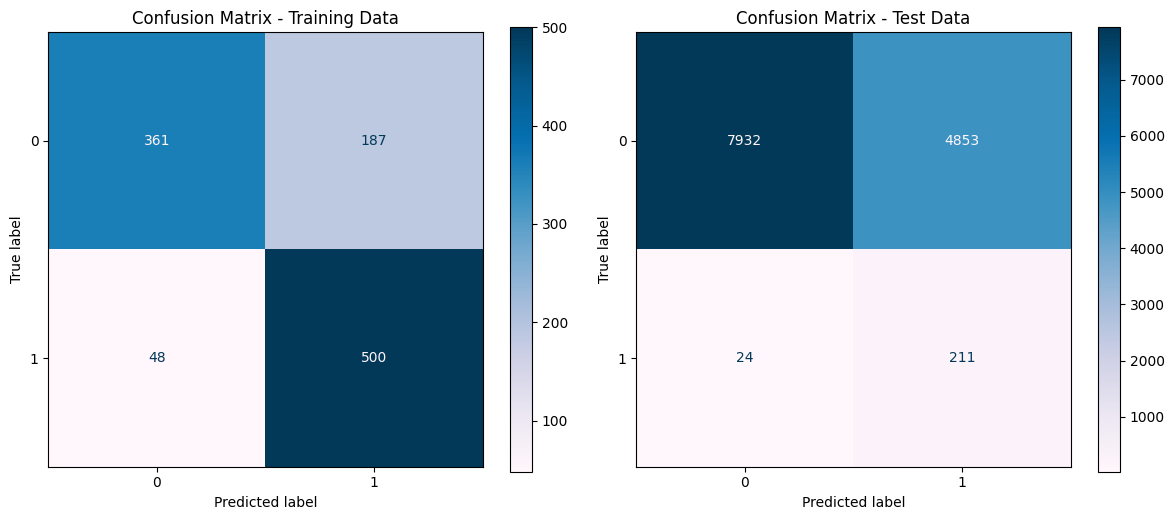

In [53]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_resample, y_resample, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

**1. Training Data**:

- True Negatives (TN): 361 observations were correctly predicted as non-stroke.
- False Positives (FP): 187 observations were incorrectly predicted as stroke.
- False Negatives (FN): 48 observations were incorrectly predicted as non-stroke.
- True Positives (TP): 500 observations were correctly predicted as stroke.

**2. Testing Data**:

- True Negatives (TN): 7932 observations were correctly predicted as non-stroke.
- False Positives (FP): 4853 observations were incorrectly predicted as stroke.
- False Negatives (FN): 24 observations were incorrectly predicted as non-stroke.
- True Positives (TP): 211 observations were correctly predicted as stroke.

The model demonstrates a strong capability in effectively reducing false negatives, with only 48 cases missed in training and 24 in testing. This performance is crucial for a condition like stroke where it is important to correctly identify as many true cases as possible to prevent missed diagnoses. The number of false positives is considerably high in the test data, suggesting that while the model is good at capturing most stroke cases (high recall), it does so at the expense of incorrectly labeling many non-stroke cases as strokes.

In [54]:
# Create function to create reports
def performance_report(all_reports, y_resample, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_resample, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }
    
    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_resample, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]
    
    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_resample, y_pred_train, y_test, y_pred_test, 'Random Forest without Tuning')

pd.DataFrame(all_reports)

,Random Forest without Tuning
Recall Train Set,0.912409
Recall Test Set,0.897872
False Negative Train,48.000000
False Negative Test,24.000000


The table presents the performance report of the Random Forest model without tuning, showing high recall rates and minimal false negatives in both training and testing.

#### **ii. Best Model with Hyperparameter Tuning**

While the model is performing well, there is still room for improvement. Therefore, **hyperparameter tuning** is used here to optimize the Random Forest model further and achieve even better results.

Hyperparameter tuning is used to enhance the model's performance by finding the optimal values for predefined parameters. GridSearchCV is a method for systematically searching through a grid of hyperparameters to identify the best combination. This technique involves cross-validation to evaluate each set of parameters. Once the best parameters are determined, predictions can be made using the optimized model.

There are several parameters explored in this tuning, each chosen for specific reasons:

- **n_estimators**: Determines the number of trees in the Random Forest ensemble. More trees can lead to better performance but may increase computational complexity.

- **max_depth**: Controls the maximum depth of each tree in the ensemble. Deeper trees can capture more complex patterns but may lead to overfitting.

- **min_samples_split**: Specifies the minimum number of samples required to split an internal node. Increasing this parameter can prevent overfitting by ensuring a minimum number of samples in each node.

- **min_samples_leaf**: Sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, increasing this parameter can prevent overfitting by creating larger leaf nodes.

- **class_weight**: Determines how class imbalance is handled during training. Assigning higher weights to minority classes can help the model better learn from these instances and improve its ability to predict them accurately.

In [55]:
# Set up the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [1, 2, 3, 4],
    'classifier__min_samples_split': [2, 3, 5, 7, 9],
    'classifier__min_samples_leaf': [3, 5, 7, 9, 11],
    'classifier__class_weight': ['balanced']
}

# Set up the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(pipe_rf,
                              param_grid=param_grid_rf,
                              scoring='recall',
                              cv=kf,
                              verbose=2,
                              n_jobs=-1)

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_resample, y_resample)

# Best hyperparameters for Random Forest
print('Best hyperparameters for Random Forest:', grid_search_rf.best_params_)

# Best recall for Random Forest
print('Best recall for Random Forest:', grid_search_rf.best_score_)

# Save best Random Forest model to a variable
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best hyperparameters for Random Forest: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best recall for Random Forest: 0.916163469557965


The best hyperparameters for the Random Forest model were identified as follows:

- **n_estimators**: 300
- **max_depth**: 1
- **min_samples_leaf**: 3
- **min_samples_split**: 2
- **class_weight**: 'balanced'

This resulted in the best recall score of 0.9162, highlighting the effectiveness of the tuned model in capturing stroke cases accurately.

In [56]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_rf_model.predict(X_resample)
y_pred_test_tuned = best_rf_model.predict(X_test)

In [57]:
# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_resample, y_pred_train_tuned))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tuned))

Recall Score - Train Set  :  0.9215328467153284
Recall Score - Test Set   :  0.902127659574468


After hyperparameter tuning, the recall score on the training set improved to **0.9215**, indicating that the model is now better at correctly identifying stroke cases in the training data. Similarly, on the test set, the recall score remained high at **0.9021**, showing the model's ability to generalize well to unseen data while maintaining strong performance in identifying stroke cases. The model stays a good fit after tuning.

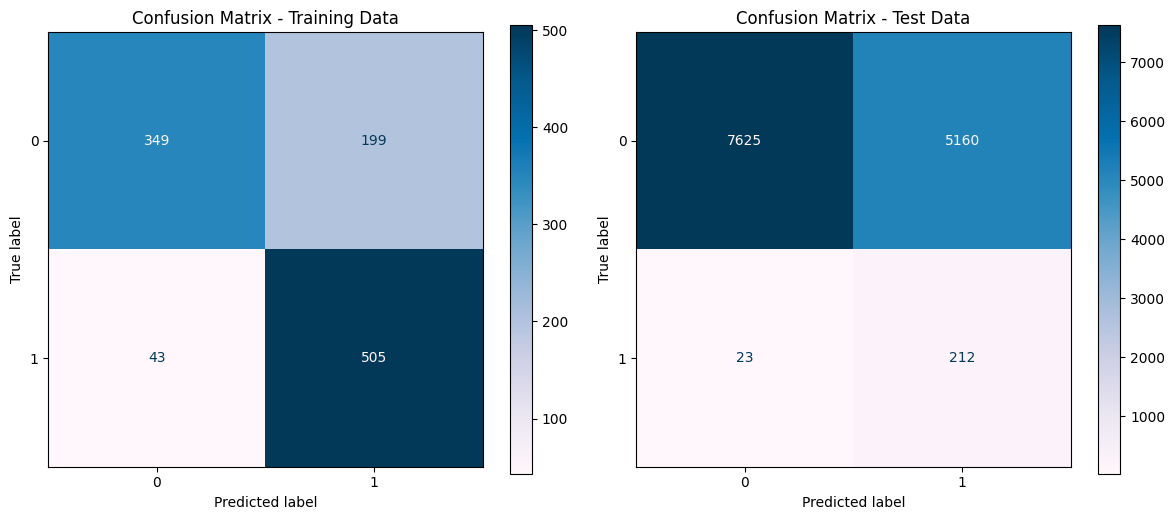

In [58]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(best_rf_model, X_resample, y_resample, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

**1. Training Data**:

- True Negatives (TN): 349 observations were correctly predicted as non-stroke.
- False Positives (FP): 199 observations were incorrectly predicted as stroke.
- False Negatives (FN): 43 observations were incorrectly predicted as non-stroke.
- True Positives (TP): 505 observations were correctly predicted as stroke.

**2. Testing Data**:

- True Negatives (TN): 7625 observations were correctly predicted as non-stroke.
- False Positives (FP): 5160 observations were incorrectly predicted as stroke.
- False Negatives (FN): 23 observations were incorrectly predicted as non-stroke.
- True Positives (TP): 212 observations were correctly predicted as stroke.

The confusion matrix provides insightful details indicating that, after tuning, the model has significantly enhanced its ability to minimize false negatives. By effectively reducing false negatives, the model ensures that fewer stroke cases go undetected.

In [59]:
# Add results to the report
all_reports = performance_report(all_reports, y_resample, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Random Forest with Tuning')
pd.DataFrame(all_reports)

,Random Forest without Tuning,Random Forest with Tuning
Recall Train Set,0.912409,0.921533
Recall Test Set,0.897872,0.902128
False Negative Train,48.000000,43.000000
False Negative Test,24.000000,23.000000


The comparison between the Random Forest model without tuning and after tuning reveals slight but notable improvements in its performance. Post-tuning, there is an increase in recall for both the training set (from 91.24% to 92.15%) and the test set (from 89.79% to 90.21%), indicating better overall accuracy in detecting true positive cases. Additionally, the tuning resulted in a reduction in false negatives, decreasing from 48 to 43 in the training set and from 24 to 23 in the test set. These improvements suggest that the tuning has made the model more effective at correctly identifying stroke cases.

### **I. Model Saving**

After tuning the model, it is saved as a .pkl file, especially when using a Pipeline. This will save all components, including preprocessing steps and the optimized model, into a single file.

In [60]:
# Save the best model
with open('best_rf_model.pkl', 'wb') as model_file:
  pickle.dump(best_rf_model, model_file)

### **J. Model Inference**

This section will be performed in a separate file named **'P1M2_livia_amanda_inference.ipynb'**.

### **K. Conceptual Problems**

#### **i. Bagging**

<center>
<img src="./bagging.png" alt="Bagging" width="500">

**Bagging**, also known as **Bootstrap Aggregation**, is an ensemble learning technique frequently used to decrease variance in noisy datasets. Bagging, first proposed by **Leo Breiman** in 1996, was motivated by the fact that certain types of learning algorithms, such as decision trees, can produce significantly different models with small changes in the training data. For instance, including or excluding just one example can lead to a markedly different outcome. Breiman introduced bagging as a method to reduce the variability of a statistical learning approach by creating multiple subsets of the training data, training a model on each subset, and then combining the predictions from these models.

In bagging, random samples from a training set are chosen with replacement, allowing individual data points to be selected multiple times. Multiple data samples are then generated, and weak models are trained independently. A weak model typically has low prediction accuracy, while strong models are highly accurate. By aggregating predictions from multiple weak models, a stronger and more accurate overall prediction can be obtained.

The diagram above shows the process of bootstrap sampling from a dataset containing 10 rows. Multiple samples (D1, D2, ..., Dk) are generated by randomly selecting rows with replacement, meaning each sample can include repeated rows.

Random Forest is an example of bagging that uses decision trees. In Random Forest, bagging is employed by using decision trees with higher variance. Random Forest is formed by aggregating predictions from a collection of random trees, which helps improve overall prediction accuracy.

[Reference 1](https://link.springer.com/referenceworkentry/10.1007/978-0-387-39940-9_567#:~:text=Bagging%20was%20originally%20proposed%20by,or%20exclusion%20of%20one%20example.)  
[Reference 2](https://www.ibm.com/topics/bagging#:~:text=IBM-,What%20is%20bagging%3F,be%20chosen%20more%20than%20once.)

#### **ii. Random Forest vs XGBoost**

<center>
<img src="./random_vs_xgboost.jpeg" alt="Random Forest vs XGBoost" width="500">

**Random Forest** algorithm is an ensemble method that creates numerous decision trees during the training phase and produces an average of their predictions for regression tasks or uses majority voting for classification tasks.

**XGBoost(Extreme Gradient Boosting)** is a fast and flexible algorithm that builds trees sequentially, correcting errors from previous ones to improve predictions. The model uses a gradient descent algorithm to minimize the loss when adding new models. It includes optimizations like regularization, handling missing data, and tree trimming. It is usually recommended for an imbalanced data.

<center>

**Comparison between Random Forest and XGBoost**

| Feature                    | Random Forest                                                             | XGBoost                                                                   |
|----------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Model Building             | Ensemble learning using independently built decision trees                | Sequential ensemble learning with trees correcting errors of previous ones |
| Optimization Approach      | Makes predictions by averaging individual tree outputs                    | Uses gradient boosting to minimize a loss function and improve accuracy iteratively |
| Handling Unbalanced Datasets | Faces challenges in handling unbalanced datasets                                                      | Expertly manages unbalanced datasets                                                    |
| Ease of Tuning             | Simple and straightforward                                                | Requires more practice but offers higher accuracy                        |
| Adaptability to Distributed Computing | Works well with multiple machines                                    | Needs more coordination but can handle large datasets efficiently         |
| Handling Large Datasets    | Can handle them but may slow down with very large data                   | Built for speed, perfect for big datasets                                 |
| Predictive Accuracy        | Good, but not always the most precise                                    | Superior accuracy, especially in tough situations                          |


[Reference](https://www.geeksforgeeks.org/difference-between-random-forest-vs-xgboost/)

#### **iii. Cross Validation**

<center>

<img src="./crossval.png" alt="Cross Validatio" width="500">

**Cross-validation** is a method used to evaluate the performance of a Machine Learning model. It involves creating and evaluating multiple models on different subsets of the dataset, providing performance metrics like mean and standard deviation. The mean indicates the average performance of the procedure, while the standard deviation shows how much the performance is expected to vary. These metrics help establish a confidence interval for the model's expected performance on the test set. Types of cross-validation:

- A common technique for cross-validation is the **K-Folds** method. This method divides the dataset into K groups, using one group for testing and the rest for training iteratively. This approach ensures that all data points contribute to both training and testing, minimizing bias. The value of K, usually between 5 and 10, determines the number of splits. During the process, the model is trained on K-1 folds and validated on the remaining fold, repeating until each fold acts as the test set. The average performance across these iterations measures the model's effectiveness.

- For classification models, the **StratifiedKfold** technique maintains a balanced distribution of classes in each fold, improving the model's reliability. Overall, cross-validation aids in evaluating model performance, reducing bias, and enhancing reliability.

[Reference 1](https://datascientest.com/en/the-importance-of-cross-validation#:~:text=Cross%2DValidation%20is%20a%20method,to%20work%20on%20new%20data.)  
[Reference 2](https://www.analyticsvidhya.com/blog/2022/02/different-types-of-cross-validations-in-machine-learning/)

### **L. Analysis**

#### **i. EDA**

- **Demographic Overview**: The dataset predominantly consists of females, individuals without hypertension or heart disease, mostly married and employed in private jobs, residing equally in urban and rural areas, with a significant portion having never smoked.

- **Stroke Incidence Across Demographic Factors**: Stroke incidence varies across different demographic factors, with hypertension and heart disease significantly increasing the risk, married individuals showing higher stroke counts, and non-smokers having the highest count of individuals without stroke but also a substantial number with stroke cases.

- **Distribution Analysis**: The dataset have a wide age range, with peaks in the late 20s and late 50s, average glucose levels mostly within a healthy range but with some indicating potential diabetes, and a BMI distribution skewed towards overweight and obesity, highlighting a substantial portion of the population in these categories.

- **Correlation Analysis**: The data suggests a normal range of average glucose levels across age groups, an increase in BMI with age until around 60, and a dense clustering of individuals in the overweight category, hinting at a potential link between obesity and higher glucose levels.

- **Stroke Percentages**: Strokes are rare in the dataset, with only 1.8% of individuals experiencing a stroke, highlighting an imbalance in the data that require handling.

#### **ii. Bussiness Insights**

- **Demographic Insights**: The healthcare center can customize products and services to meet the specific health and lifestyle requirements of these demographics.

- **Stroke Risk Assessment**: Understanding stroke risk factors like hypertension, heart disease, marital status, and smoking habits helps healthcare center develop targeted health initiatives and insurance plans for vulnerable groups.

- **Health Profile Implications**: The dataset's diverse age range, glucose levels, and BMI distribution suggest potential health challenges, including diabetes and obesity-related issues. Healthcare providers can use this information to design preventive care programs and personalized treatment plans.

- **Correlation Insights for Health Management**: Recognizing the correlation between age, BMI, and glucose levels informs effective health management strategies focusing on weight control, glucose monitoring, and lifestyle interventions to reduce obesity-related health risks.

- **Data Imbalance Impact**: The low incidence of strokes in the dataset, at only 1.8% of individuals, suggests a potential opportunity for healthcare center to focus on preventive measures and interventions aimed at reducing stroke risk factors in their target population.

#### **iii. Model Evaluation**

- **Best Model**: Random Forest stands out as the top-performing model with a validation score of **0.8942**, indicating its superiority over other models based on the chosen evaluation metric.

- **Metris Evaluation Training Set:**
  - **Recall without Tuning**: Achieves 0.9124, capturing about 91.24% of positives.
  - **Recall with Tuning**: Improves to 0.9215, capturing about 92.15% of positives.
  - **False Negatives without Tuning**: 48 indicates that 48 positive cases were incorrectly classified as negative.
  - **False Negatives with Tuning**: 43 indicates that 43 positive cases were incorrectly classified as negative.

- **Metris Evaluation Testing Set:**
  - **Recall without Tuning**: Reaches 0.8978, capturing about 89.78% of positives.
  - **Recall with Tuning**: Increases to 0.9021, capturing about 90.21% of positives.
  - **False Negatives without Tuning**: 24 indicates that 24 positive cases were incorrectly classified as negative.
  - **False Negatives with Tuning**: 23 indicates that 23 positive cases were incorrectly classified as negative.

  Therefore, the model shows significant improvement in recall after tuning, reducing false negatives by 38 cases.

- **Model Fit**: The model demonstrates an **good fit** between the training and testing sets without and with tuning, indicating it is capable on capturing the complexity of the data well enough.

- **Prediction Capability**: Despite the presence of errors that need further adjustment, the model can still be effectively used to predict default with some degree of accuracy.

- **Model Advantages**:
  - Shows better validation scores than other models, indicating improved predictive performance.
  - Helps reduce overfitting issues found in individual decision trees, leading to better accuracy.
  - Determines feature importance by evaluating their contributions to overall impurity reduction, aiding in feature selection and understanding data patterns.
  - Can model complex, non-linear relationships between features and target variables, improving predictive capabilities.
  - Allows for parallel tree creation, speeding up training time by eliminating dependencies between iterations.
  
- **Model Limitations**:
   - Becomes computationally expensive with large datasets, impacting scalability and resource usage.
   - While resistant to overfitting, it can still occur, especially with noisy data.
   - Lack of interpretability due to the ensemble nature of the model, making it difficult to explain individual predictions.
   - Training on imbalanced datasets may result in biased predictions, as the model tends to favor the majority class over the minority, indicates it needs data imbalance handling.
   - Optimizing Random Forest models can be difficult due to the numerous hyperparameters involved, which necessitates thorough experimentation.

[Reference 1](https://www.geeksforgeeks.org/what-are-the-advantages-and-disadvantages-of-random-forest/)  
[Reference 2](https://aiml.com/what-are-the-advantages-and-disadvantages-of-random-forest/)

#### **iv. Model Improvement**

- **Imbalance Data Handling**: Experiment with methods like Synthetic Minority Over-sampling Technique (SMOTE) or SMOTE-Tomek Links to address imbalanced data challenges.

- **Hyperparameter Optimization**: Fine-tune hyperparameters extensively for improved model optimization.

- **Ensemble Techniques**: Consider using stacking or boosting methods to enhance predictive power and robustness. For example, combine Random Forest with a Gradient Boosting Machine (GBM) or XGBoost to increase the strengths of both algorithms and improve overall performance.

- **Feature Engineering**: Implement feature engineering strategies to extract more meaningful information from the data.

- **Evaluation Metrics Expansion**: Explore additional evaluation metrics beyond recall to gain a comprehensive performance assessment, such as area under the ROC curve (AUC-ROC) to evaluate the model's overall effectiveness.

### **M. Conclusion**

The **Random Forest** model shows satisfactory recall in predicting strokes, with an outstanding testing score of 0.9021, highlighting its ability to generalize to new data. While its performance is promising, there is room for improvement to enhance accuracy and minimize False Negatives error further.